In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#leer tabla del cúmulo (poner el archivo que corresponda)
df = pd.read_csv('vdBH_92_tabla.dat')

In [3]:
#ver las primeras y últimas filas de la tabla
df

,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,distance
0,0.002231,1636148068921376768,Gaia DR3 5354890835825393664,5354890835825393664,1338132369,2016.0,154.782200,0.180551,-56.427198,0.166958,...,1.8270,2.1676,1.3149,1.2379,1.4789,0.7211,0.6804,0.8099,PHOENIX,219593.610847
1,0.002559,1636148068921376768,Gaia DR3 5354891596047012608,5354891596047012608,493430067,2016.0,154.782479,0.049280,-56.422499,0.047914,...,1.4344,1.5533,1.1788,1.1386,1.2382,0.6472,0.6253,0.6794,MARCS,2531.100995
2,0.002870,1636148068921376768,Gaia DR3 5354890840132767360,5354890840132767360,1240878058,2016.0,154.784416,0.084131,-56.427374,0.079169,...,1.3301,1.4444,1.1093,1.0412,1.1363,0.6176,0.5786,0.6325,MARCS,1722.092414
3,0.003134,1636148068921376768,Gaia DR3 5354890835821631616,5354890835821631616,646080810,2016.0,154.786761,0.011094,-56.426165,0.010876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734.777806
4,0.003256,1636148068921376768,Gaia DR3 5354890835821940864,5354890835821940864,649662178,2016.0,154.779433,0.085468,-56.428048,0.081514,...,1.9978,2.1009,1.5659,1.5120,1.5962,0.8650,0.8334,0.8824,MARCS,2047.594409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.041515,1636148068921376768,Gaia DR3 5354892489393645184,5354892489393645184,1173386745,2016.0,154.819085,0.417586,-56.389069,0.369866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6105.255451
903,0.041541,1636148068921376768,Gaia DR3 5354891973996714496,5354891973996714496,348463956,2016.0,154.732223,2.609902,-56.393657,1.612733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,0.041544,1636148068921376768,Gaia DR3 5354891218083197568,5354891218083197568,963363256,2016.0,154.726799,0.080877,-56.453487,0.068584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4462.549737
905,0.041623,1636148068921376768,Gaia DR3 5354890702693822976,5354890702693822976,1573421049,2016.0,154.853719,0.035756,-56.436741,0.033901,...,1.1469,1.2279,0.9797,0.9271,0.9956,0.5329,0.5045,0.5417,MARCS,1626.084696


Text(0.5, 1.0, 'Zona de sobredensidad de movimientos propios')

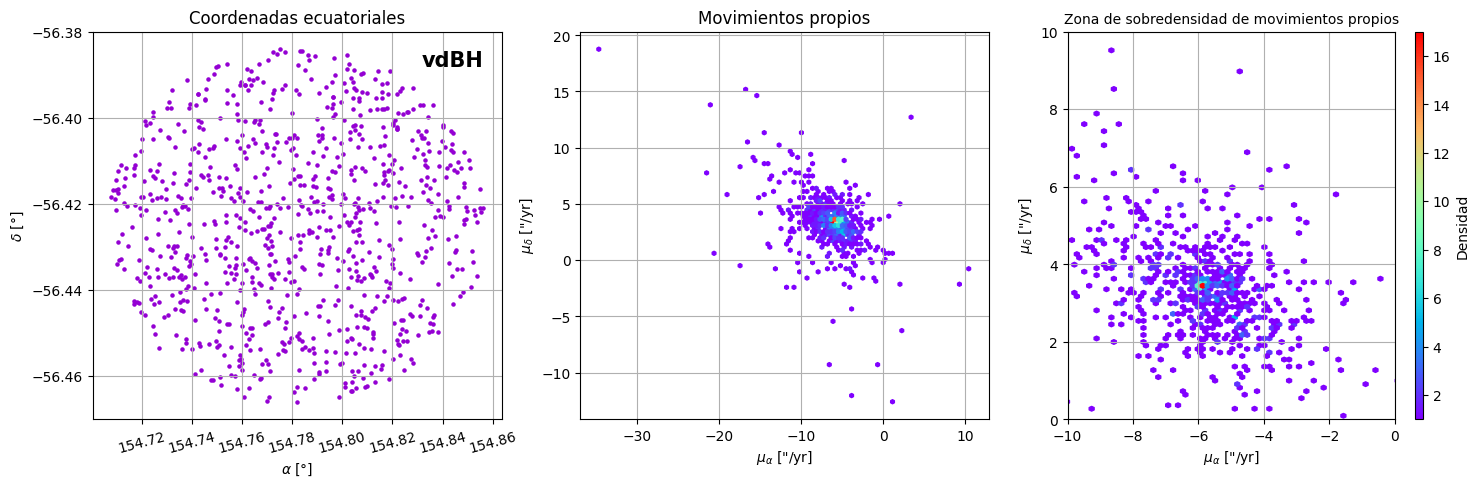

In [4]:
plt.figure(figsize=(15,5))

#RA vs DEC
plt.subplot(1,3,1)
plt.scatter(df['ra'],df['dec'], s=5, c='darkviolet', label='vdBH')
plt.xlabel(r'$\alpha$ [°]')
plt.xticks(rotation=15)
plt.ylabel(r'$\delta$ [°]')
plt.grid()
plt.legend(frameon=False, markerscale=0, prop={'weight' : 'bold', 'size':15}, loc='upper right')
plt.title('Coordenadas ecuatoriales')

#Mov. propios alpha y delta
plt.subplot(1,3,2)
plt.hexbin(x=df['pmra'],y=df['pmdec'],gridsize=100, cmap='rainbow', mincnt=1)
plt.xlabel(r'$\mu_{\alpha}$ ["/yr]')
plt.ylabel(r'$\mu_{\delta}$ ["/yr]')
plt.grid()
plt.title('Movimientos propios')

#Zoom al movimiento propio
plt.subplot(1,3,3)
plt.hexbin(x=df['pmra'],y=df['pmdec'],gridsize=300, cmap='rainbow', mincnt=1)
plt.xlim(-10,0)
plt.ylim(0,10)
plt.xlabel(r'$\mu_{\alpha}$ ["/yr]')
plt.ylabel(r'$\mu_{\delta}$ ["/yr]')
plt.colorbar(label='Densidad', aspect=50)
plt.grid()
plt.tight_layout()
plt.title('Zona de sobredensidad de movimientos propios', fontsize=10)

In [5]:
#Defino subconjunto Comoving con la ecuación que obtengo al seleccionar manualmente la región de sobredensidad
Comoving = df[( (0.931*(df['pmra'] + 5.92) - 0.778*(df['pmdec'] - 3.40))**2 + (1.45*(df['pmra'] + 5.92) + 1.98*(df['pmdec'] - 3.40))**2 ) < 1]
Comoving

,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,distance
2,0.002870,1636148068921376768,Gaia DR3 5354890840132767360,5354890840132767360,1240878058,2016.0,154.784416,0.084131,-56.427374,0.079169,...,1.3301,1.4444,1.1093,1.0412,1.1363,0.6176,0.5786,0.6325,MARCS,1722.092414
3,0.003134,1636148068921376768,Gaia DR3 5354890835821631616,5354890835821631616,646080810,2016.0,154.786761,0.011094,-56.426165,0.010876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734.777806
10,0.004460,1636148068921376768,Gaia DR3 5354891596047012352,5354891596047012352,159292578,2016.0,154.778440,0.011095,-56.420874,0.011201,...,1.6506,1.6536,1.5187,1.5172,1.5201,0.8220,0.8211,0.8228,A,2759.354200
15,0.005144,1636148068921376768,Gaia DR3 5354890943211984384,5354890943211984384,157352383,2016.0,154.790762,0.012987,-56.425469,0.012632,...,1.6229,1.6334,1.4763,1.4711,1.4814,0.7969,0.7941,0.7997,A,2589.287642
17,0.005485,1636148068921376768,Gaia DR3 5354891596040377088,5354891596040377088,1239934593,2016.0,154.771643,0.237541,-56.424391,0.214314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2776.791320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,0.040418,1636148068921376768,Gaia DR3 5354893275364343040,5354893275364343040,896459856,2016.0,154.777309,0.106089,-56.384649,0.093175,...,2.8286,2.9737,2.1398,2.0632,2.1818,1.1848,1.1426,1.2091,MARCS,2876.890320
871,0.040694,1636148068921376768,Gaia DR3 5354890732746184448,5354890732746184448,1751376674,2016.0,154.810028,0.420887,-56.462515,0.427200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-21639.917636
872,0.040702,1636148068921376768,Gaia DR3 5354892180162578048,5354892180162578048,1706141832,2016.0,154.854761,0.066257,-56.421128,0.062661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11918.777652
885,0.041067,1636148068921376768,Gaia DR3 5354892420674169088,5354892420674169088,1766308203,2016.0,154.836086,0.188502,-56.397169,0.164097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929.872188


Text(0.5, 1.0, 'Zoom a Movimientos propios')

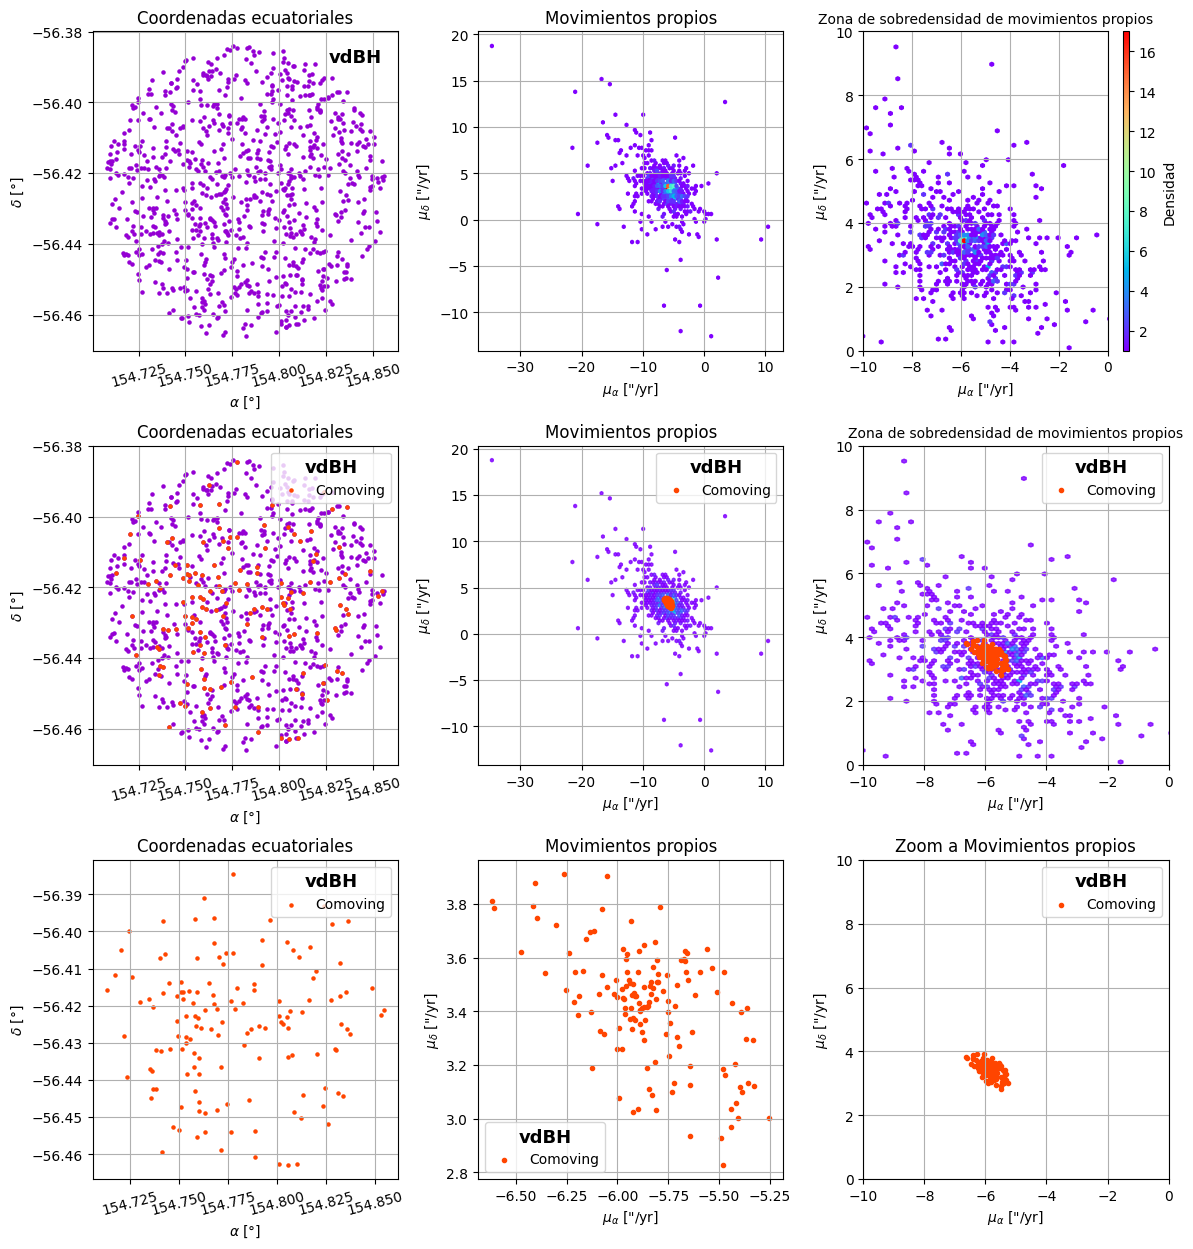

In [6]:
#Señalamos los Comoving en los gráficos
plt.figure(figsize=(12,12))

#RA vs DEC
plt.subplot(3,3,1)
plt.scatter(df['ra'],df['dec'], s=5, c='darkviolet', label='vdBH')
plt.xlabel(r'$\alpha$ [°]')
plt.xticks(rotation=15)
plt.ylabel(r'$\delta$ [°]')
plt.grid()
plt.legend(frameon=False, markerscale=0, prop={'weight' : 'bold', 'size':13}, loc='upper right')
plt.title('Coordenadas ecuatoriales')

#Mov. propios alpha y delta
plt.subplot(3,3,2)
plt.hexbin(x=df['pmra'],y=df['pmdec'],gridsize=100, cmap='rainbow', mincnt=1)
plt.xlabel(r'$\mu_{\alpha}$ ["/yr]')
plt.ylabel(r'$\mu_{\delta}$ ["/yr]')
plt.grid()
plt.title('Movimientos propios')

#Zoom al movimiento propio
plt.subplot(3,3,3)
plt.hexbin(x=df['pmra'],y=df['pmdec'],gridsize=300, cmap='rainbow', mincnt=1)
plt.xlim(-10,0)
plt.ylim(0,10)
plt.xlabel(r'$\mu_{\alpha}$ ["/yr]')
plt.ylabel(r'$\mu_{\delta}$ ["/yr]')
plt.colorbar(label='Densidad', aspect=50)
plt.grid()
plt.title('Zona de sobredensidad de movimientos propios', fontsize=10)


#Añadimos Comovings
#RA vs DEC
plt.subplot(3,3,4)
plt.scatter(df['ra'],df['dec'], s=5, c='darkviolet')
plt.scatter(Comoving['ra'], Comoving['dec'], s=5, c='orangered', label='Comoving')
plt.xlabel(r'$\alpha$ [°]')
plt.xticks(rotation=15)
plt.ylabel(r'$\delta$ [°]')
plt.grid()
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13}, loc='upper right')
plt.title('Coordenadas ecuatoriales')

#Mov. propios alpha y delta
plt.subplot(3,3,5)
plt.hexbin(x=df['pmra'],y=df['pmdec'],gridsize=100, cmap='rainbow', mincnt=1, alpha=0.8)
plt.scatter(Comoving['pmra'], Comoving['pmdec'], c='orangered', marker='.', label='Comoving')
plt.xlabel(r'$\mu_{\alpha}$ ["/yr]')
plt.ylabel(r'$\mu_{\delta}$ ["/yr]')
plt.grid()
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13})
plt.title('Movimientos propios')

#Zoom al movimiento propio
plt.subplot(3,3,6)
plt.hexbin(x=df['pmra'],y=df['pmdec'],gridsize=300, cmap='rainbow', mincnt=1, alpha=0.8)
plt.scatter(Comoving['pmra'], Comoving['pmdec'], c='orangered', marker='.', label='Comoving')
plt.xlim(-10,0)
plt.ylim(0,10)
plt.xlabel(r'$\mu_{\alpha}$ ["/yr]')
plt.ylabel(r'$\mu_{\delta}$ ["/yr]')
plt.grid()
#plt.colorbar(label='Densidad', aspect=50, cmap='rainbow')
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13})
plt.tight_layout()
plt.title('Zona de sobredensidad de movimientos propios', fontsize=10)

#Sólo Comovings (quitamos otras fuentes)
#RA vs DEC
plt.subplot(3,3,7)
plt.scatter(Comoving['ra'], Comoving['dec'], s=5, c='orangered', label='Comoving')
plt.xlabel(r'$\alpha$ [°]')
plt.xticks(rotation=15)
plt.ylabel(r'$\delta$ [°]')
plt.grid()
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13}, loc='upper right')
plt.title('Coordenadas ecuatoriales')

#Mov. propios alpha y delta
plt.subplot(3,3,8)
plt.scatter(Comoving['pmra'], Comoving['pmdec'], c='orangered', marker='.', label='Comoving')
plt.xlabel(r'$\mu_{\alpha}$ ["/yr]')
plt.ylabel(r'$\mu_{\delta}$ ["/yr]')
plt.grid()
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13})
plt.title('Movimientos propios')

#Mov. propios alpha y delta
plt.subplot(3,3,9)
plt.scatter(Comoving['pmra'], Comoving['pmdec'], c='orangered', marker='.', label='Comoving')
plt.xlim(-10,0)
plt.ylim(0,10)
plt.xlabel(r'$\mu_{\alpha}$ ["/yr]')
plt.ylabel(r'$\mu_{\delta}$ ["/yr]')
plt.grid()
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13})
plt.title('Zoom a Movimientos propios')

Text(0.5, 1.0, 'Distribución de paralajes')

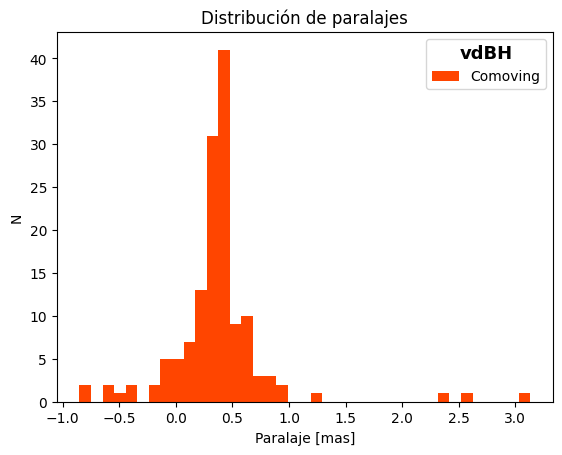

In [7]:
#Vemos paralajes:
plt.hist(Comoving['parallax'], label='Comoving', color='orangered', bins=39)
plt.xlabel('Paralaje [mas]')
plt.ylabel('N')
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13}, loc='upper right')
plt.title('Distribución de paralajes')

In [8]:
#Seleccionamos el área central de la distribución
Cluster = Comoving[ (Comoving['parallax'] > 0.2) & (Comoving['parallax'] < 0.5)]
Cluster

,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,distance
3,0.003134,1636148068921376768,Gaia DR3 5354890835821631616,5354890835821631616,646080810,2016.0,154.786761,0.011094,-56.426165,0.010876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734.777806
10,0.004460,1636148068921376768,Gaia DR3 5354891596047012352,5354891596047012352,159292578,2016.0,154.778440,0.011095,-56.420874,0.011201,...,1.6506,1.6536,1.5187,1.5172,1.5201,0.8220,0.8211,0.8228,A,2759.354200
15,0.005144,1636148068921376768,Gaia DR3 5354890943211984384,5354890943211984384,157352383,2016.0,154.790762,0.012987,-56.425469,0.012632,...,1.6229,1.6334,1.4763,1.4711,1.4814,0.7969,0.7941,0.7997,A,2589.287642
17,0.005485,1636148068921376768,Gaia DR3 5354891596040377088,5354891596040377088,1239934593,2016.0,154.771643,0.237541,-56.424391,0.214314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2776.791320
19,0.005561,1636148068921376768,Gaia DR3 5354890840126132864,5354890840126132864,28924303,2016.0,154.783080,0.167810,-56.430492,0.155193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3470.592410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0.039570,1636148068921376768,Gaia DR3 5354892485089440384,5354892485089440384,1459806476,2016.0,154.823839,0.089916,-56.393108,0.078557,...,0.8682,1.0282,0.7353,0.6698,0.7986,0.4024,0.3663,0.4372,MARCS,2361.530835
853,0.040340,1636148068921376768,Gaia DR3 5354891870917479680,5354891870917479680,363557262,2016.0,154.724551,0.306090,-56.399806,0.270961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2137.511547
857,0.040418,1636148068921376768,Gaia DR3 5354893275364343040,5354893275364343040,896459856,2016.0,154.777309,0.106089,-56.384649,0.093175,...,2.8286,2.9737,2.1398,2.0632,2.1818,1.1848,1.1426,1.2091,MARCS,2876.890320
885,0.041067,1636148068921376768,Gaia DR3 5354892420674169088,5354892420674169088,1766308203,2016.0,154.836086,0.188502,-56.397169,0.164097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929.872188


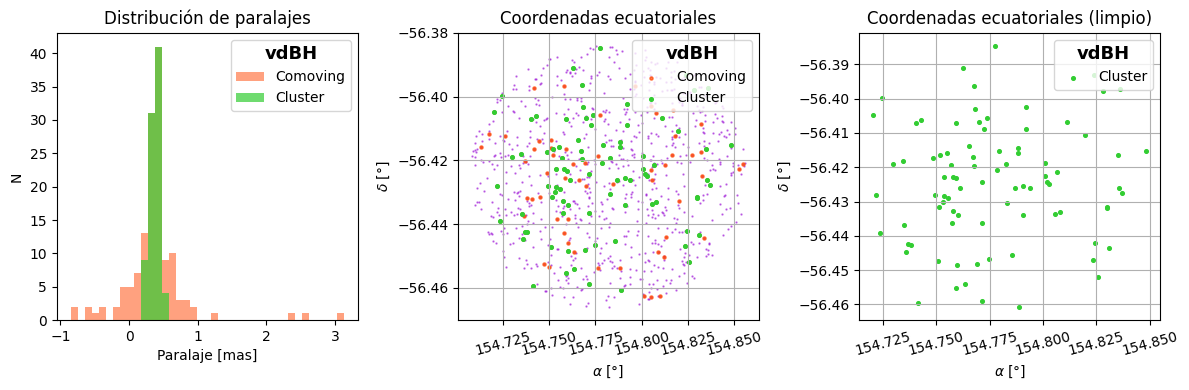

In [9]:
#Paralajes:

#crear bines para ambas distribuciones:
# Calcular el rango combinado
min_val = min(Comoving['parallax'].min(), Cluster['parallax'].min())
max_val = max(Comoving['parallax'].max(), Cluster['parallax'].max())

# Crear bins comunes
bins = np.linspace(min_val, max_val, 40)  # 40 intervalos

plt.figure(figsize=(12,4))

#Gráfico de histogramas
plt.subplot(1,3,1)
plt.hist(Comoving['parallax'], label='Comoving', color='orangered', bins=bins, alpha=0.5)
plt.hist(Cluster['parallax'], label='Cluster', color='limegreen', bins=bins, alpha=0.7)
plt.xlabel('Paralaje [mas]')
plt.ylabel('N')
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13}, loc='upper right')
plt.title('Distribución de paralajes')

#RA vs DEC
plt.subplot(1,3,2)
plt.scatter(df['ra'],df['dec'], s=0.5, c='darkviolet', alpha=0.5)
plt.scatter(Comoving['ra'], Comoving['dec'], s=5, c='orangered', label='Comoving', alpha=0.7)
plt.scatter(Cluster['ra'], Cluster['dec'], s=7, c='limegreen', label='Cluster')
plt.xlabel(r'$\alpha$ [°]')
plt.xticks(rotation=15)
plt.ylabel(r'$\delta$ [°]')
plt.grid()
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13}, loc='upper right')
plt.title('Coordenadas ecuatoriales')

#Sólo Cluster RA vs DEC
plt.subplot(1,3,3)
plt.scatter(Cluster['ra'], Cluster['dec'], s=7, c='limegreen', label='Cluster')
plt.xlabel(r'$\alpha$ [°]')
plt.xticks(rotation=15)
plt.ylabel(r'$\delta$ [°]')
plt.grid()
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13}, loc='upper right')
plt.title('Coordenadas ecuatoriales (limpio)')
plt.tight_layout()

In [10]:
#Descartamos aquellos con errores superiores a cierto valor
umbral = 0.3
vdBH = Cluster[((Cluster['parallax_error']/Cluster['parallax']) < umbral)]
vdBH

,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,distance
3,0.003134,1636148068921376768,Gaia DR3 5354890835821631616,5354890835821631616,646080810,2016.0,154.786761,0.011094,-56.426165,0.010876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734.777806
10,0.004460,1636148068921376768,Gaia DR3 5354891596047012352,5354891596047012352,159292578,2016.0,154.778440,0.011095,-56.420874,0.011201,...,1.6506,1.6536,1.5187,1.5172,1.5201,0.8220,0.8211,0.8228,A,2759.354200
15,0.005144,1636148068921376768,Gaia DR3 5354890943211984384,5354890943211984384,157352383,2016.0,154.790762,0.012987,-56.425469,0.012632,...,1.6229,1.6334,1.4763,1.4711,1.4814,0.7969,0.7941,0.7997,A,2589.287642
22,0.005880,1636148068921376768,Gaia DR3 5354891699126229760,5354891699126229760,899982936,2016.0,154.782692,0.029729,-56.419157,0.026975,...,1.7121,1.9061,1.5849,1.4618,1.6403,0.8601,0.7949,0.8893,MARCS,2378.554951
57,0.009345,1636148068921376768,Gaia DR3 5354891596047010944,5354891596047010944,1511132757,2016.0,154.767805,0.012161,-56.419526,0.011172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2600.698160
64,0.009896,1636148068921376768,Gaia DR3 5354890938901179136,5354890938901179136,649306520,2016.0,154.788365,0.033840,-56.415861,0.034333,...,1.5005,1.5194,1.2550,1.2447,1.2610,0.6883,0.6827,0.6916,A,2678.318023
65,0.009908,1636148068921376768,Gaia DR3 5354891699126230016,5354891699126230016,888898356,2016.0,154.779263,0.009754,-56.415170,0.009507,...,0.1048,0.1587,0.1201,0.0921,0.1396,0.0651,0.0500,0.0757,MARCS,2390.073863
73,0.010351,1636148068921376768,Gaia DR3 5354890835821935616,5354890835821935616,664872892,2016.0,154.790855,0.018339,-56.433965,0.017642,...,1.3221,1.3280,1.1836,1.1806,1.1861,0.6381,0.6364,0.6395,PHOENIX,2457.167792
79,0.010929,1636148068921376768,Gaia DR3 5354890943211987072,5354890943211987072,1377146082,2016.0,154.800804,0.036152,-56.422662,0.034707,...,1.2474,1.2885,1.0423,1.0252,1.0610,0.5748,0.5655,0.5851,A,2251.897061
83,0.011102,1636148068921376768,Gaia DR3 5354891596047011584,5354891596047011584,11218251,2016.0,154.767430,0.014618,-56.417082,0.013952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2821.967625


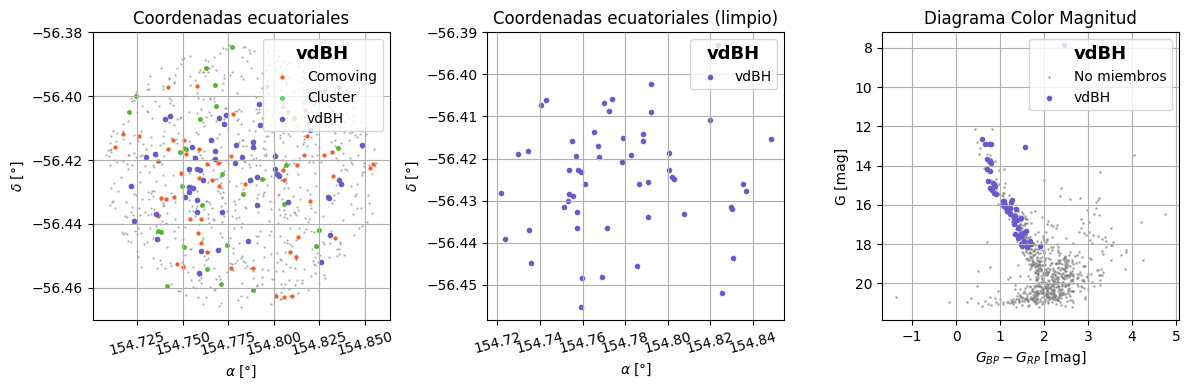

In [11]:
plt.figure(figsize=(12,4))

#RA vs DEC
plt.subplot(1,3,1)
plt.scatter(df['ra'],df['dec'], s=0.5, c='grey', alpha=0.5)
plt.scatter(Comoving['ra'], Comoving['dec'], s=5, c='orangered', label='Comoving', alpha=0.7)
plt.scatter(Cluster['ra'], Cluster['dec'], s=7, c='limegreen', label='Cluster', alpha=0.7)
plt.scatter(vdBH['ra'], vdBH['dec'], s=9, c='slateblue', label='vdBH')
plt.xlabel(r'$\alpha$ [°]')
plt.xticks(rotation=15)
plt.ylabel(r'$\delta$ [°]')
plt.grid()
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13}, loc='upper right')
plt.title('Coordenadas ecuatoriales')
plt.tight_layout()

#RA vs DEC Sólo vdBH
plt.subplot(1,3,2)
plt.scatter(vdBH['ra'], vdBH['dec'], s=9, c='slateblue', label='vdBH')
plt.xlabel(r'$\alpha$ [°]')
plt.xticks(rotation=15)
plt.ylabel(r'$\delta$ [°]')
plt.grid()
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13}, loc='upper right')
plt.title('Coordenadas ecuatoriales (limpio)')

#DCM
plt.subplot(1,3,3)
plt.scatter(df['bp_rp'], df['phot_g_mean_mag'], s=1, c='gray', label='No miembros', alpha=0.5)
plt.scatter(vdBH['bp_rp'], vdBH['phot_g_mean_mag'], s=9, c='slateblue', label='vdBH')
plt.xlabel('$G_{BP}-G_{RP}$ [mag]')
plt.ylabel('G [mag]')
# Invertir el eje Y
plt.gca().invert_yaxis()
plt.grid()
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13}, loc='upper right')
plt.title('Diagrama Color Magnitud')
plt.tight_layout()

In [12]:
#leer isócronas teóricas de GAIA
ajuste = pd.read_csv('3_7-0.0152_tabla.dat')
envol1 = pd.read_csv('1_7-0.0152_tabla.dat')
envol2 = pd.read_csv('5_7-0.0152_tabla.dat')

In [13]:
#subconjunto para quitar partes feas o raras de isócronnas
#en este caso no hace falta
#envol1_nueva = envol1[((envol1['G_BPmag']-envol1['G_RPmag']) <3.5) & (envol1['Gmag'] >-10) & (envol1['Gmag'] <12) ]

Text(0.5, 1.0, 'Diagrama Color Magnitud')

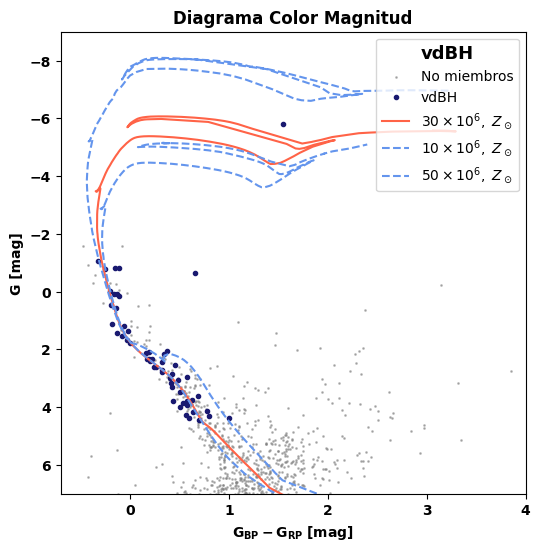

In [14]:
#DCM
plt.figure(figsize=(6,6))
plt.scatter(df['bp_rp']-0.9, df['phot_g_mean_mag']-13.7, s=1, c='gray', label='No miembros', alpha=0.5)
plt.scatter(vdBH['bp_rp']-0.9, vdBH['phot_g_mean_mag']-13.7, s=9, c='midnightblue', label='vdBH')
plt.plot((ajuste['G_BPmag']-ajuste['G_RPmag']), ajuste['Gmag'], c='tomato', label=r'$30 \times10^6, \ Z_\odot$')
plt.plot((envol1['G_BPmag']-envol1['G_RPmag']), envol1['Gmag'], linestyle='--', c='cornflowerblue', label=r'$10 \times10^6, \ Z_\odot$')
plt.plot((envol2['G_BPmag']-envol2['G_RPmag']), envol2['Gmag'], linestyle='--', c='cornflowerblue', label=r'$50 \times10^6, \ Z_\odot$')
plt.xlabel(r"$\mathbf{G_{BP}-G_{RP} \ [mag]}$")
plt.ylabel('G [mag]', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.gca().invert_yaxis()
plt.xlim(-0.7, 4)
plt.ylim(7,-9)
plt.legend(title='vdBH', title_fontproperties={'weight' : 'bold',  'size':13}, loc='upper right')
plt.title('Diagrama Color Magnitud', fontweight='bold')
